  <style>
    .container {
      display: flex;
      justify-content: space-between;
      align-items: center;
      width: 100%
    }

    .text {
      width: 95%;
       text-align: center;
    }

    .image {
      width: 5%;
      text-align: center; 
    }

    .whiteBack {
      background-color: white; 
      width: 10%;
      height: 10%;
    }
    
    .image img {
      max-width: 100%;
      height: auto;
    }
  </style> 
  
  <div class="container">
    <div class="image">
      <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Logo_KIT.svg/1200px-Logo_KIT.svg.png" width=100 height=50/>
    </div>
        <div class="text">
      <h1> Medical Image Processing and Navigation 2024/25</h1>
    </div>
  </div>

---

<center>
<h2>DICOM</h2> 
<img src="https://www.outsystems.com/Forge_CW/_image.aspx/Q8LvY--6WakOw9afDCuuGegcUHzjvNXHCLnriloCmZ4=/dicom-viewer-2023-01-04%2000-00-00-2024-06-05%2008-47-51"/>

---

<center>
Lecturer: <b><i>Ciro Benito Raggio</i></b> 
<br/>
<a><href>https://www.ibt.kit.edu/english/Raggio_C.php</href></a>

# DICOM
## What is DICOM?
DICOM stands for Digital Imaging and Communications in Medicine. It is an international standard file format used for storing, sharing and transmitting medical images and their associated information.

## Read DICOM file
To read this type of data we will use the pydicom library

In [1]:
%pip install pydicom

     |████████████████████████████████| 1.8 MB 2.2 MB/s eta 0:00:01
You should consider upgrading via the '/Users/josh/Documents/University/Master/MIPN/MIPN_Python_Project/virtualenv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

dcm = pydicom.read_file('dicomsample.dcm')

## Let's explore DICOM, how is it made?

A DICOM file has an organized structure consisting of two main parts:

* ***File Header***: contains general information about the file itself and is not part of the actual image. It usually has a size of 132 bytes and includes:
    - Preamble file: Initial identifier of 128 bytes with constant value.
    - DICOM Prefix: 4 bytes containing the string "DICM".
    - File Meta Information Elements: Various elements with specific tags that describe the DICOM file, such as the DICOM version used and the size of the dataset

* ***Data Set***: This section represents the main part of the file and contains the actual image and data associated with the patient and the exam. 
    
    It is a collection of elements organized in a hierarchical structure with specific tags. Each element has three components:
    - Tag (Identifier): A unique identifier that specifies the type of item.
    - VR (Value Representation): A code that indicates the format of the element data (e.g. string, integer, date).
    - Value: The actual value of the item, depending on the type specified by the VR.
    
The hierarchical structure of the data set is often described as:
- **Patient Level**: Patient information such as name, patient ID, date of birth.
- **Study Level**: Information on the exam carried out such as type of study (X-ray, CT, MRI), date of the exam, device used.
- **Series Level**: Information about a series of related images acquired in a single study (e.g. different sequences in an MRI).
- **Instance Level**: Information about a single image within a series, such as image number in the series.

This hierarchical approach allows you to efficiently organize your data and facilitates access to specific information.

In [4]:
dcm

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Enhanced MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.8.15.999999.30000021042714174633900000049
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.12.2.1107.5.8.15.10.20090701
(0002, 0013) Implementation Version Name         SH: 'SIEMENS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'M', 'NONE']
(0008, 0012) Instance Creation Date              DA: '20210427'
(0008, 0013) Instance Creation Time              TM: '141858.718373'
(0008, 0016) SOP Class UID                       UI: Enhanced MR Image S

## But according to Python, what is a DICOM?
I can use the DICOM as if it were a simple Python dictionary

In [4]:
print(f'Dicom Keys:\n{dcm.keys()}\n\nDicom Values:\n{dcm.values()}')

Dicom Keys:
dict_keys([(0008, 0005), (0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 001b), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 002a), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0080), (0008, 0081), (0008, 0090), (0008, 1010), (0008, 1030), (0008, 103e), (0008, 1080), (0008, 1090), (0008, 1111), (0008, 2111), (0008, 9154), (0008, 9205), (0008, 9206), (0008, 9207), (0008, 9208), (0008, 9209), (0008, 9215), (0010, 0010), (0010, 0020), (0010, 0021), (0010, 0030), (0010, 0032), (0010, 0040), (0010, 1010), (0010, 1020), (0010, 1030), (0010, 2000), (0010, 2110), (0010, 2160), (0010, 4000), (0012, 0062), (0018, 0020), (0018, 0021), (0018, 0022), (0018, 0023), (0018, 0081), (0018, 0087), (0018, 0091), (0018, 1000), (0018, 1020), (0018, 1030), (0018, 5100), (0018, 9004), (0018, 9005), (0018, 9008), (0018, 9011), (0018, 9012), (0018, 9014), (0018, 9015), (0018, 9017), (0018, 9018

## Ok, but...where is the image?

<center><img src="https://media1.tenor.com/m/13VnwKt5qS0AAAAd/waiting.gif" /></center>


### The image is located under the "pixel_array" key

/home/cr762/anaconda3/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


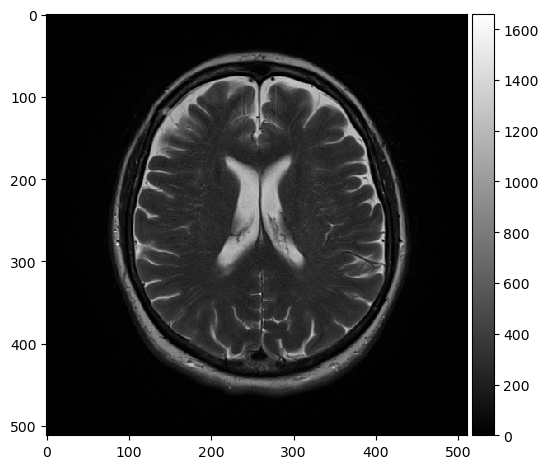

In [5]:
from skimage.io import imshow

img = dcm.pixel_array
imshow(img, cmap='gray')

### The image is always an array, so it supports all the operations we have seen so far

In [6]:
img.shape

(512, 512)

### Thanks to the DICOM file we can access all the information relating to the image, such as ID, patient details, modality!

In [7]:
print(f"""
Patient ID: {dcm.PatientID}
StudyID: {dcm.StudyID}
Modality: {dcm.Modality}
""")



Patient ID: Siemens_MAC
StudyID: 3aaaa1598
Modality: MR



### By viewing the dictionary keys, we notice that there are very specific codes

In [8]:
dcm.keys

<bound method Dataset.keys of Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Enhanced MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.8.15.999999.30000021042714174633900000049
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.12.2.1107.5.8.15.10.20090701
(0002, 0013) Implementation Version Name         SH: 'SIEMENS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'M', 'NONE']
(0008, 0012) Instance Creation Date              DA: '20210427'
(0008, 0013) Instance Creation Time              TM: '141858.718373'
(0008, 0016) SOP Class UID                

## Then we can use these codes to search for information of interest, for example:

In [9]:
dcm[0x00080020], dcm[0x00080050]

((0008, 0020) Study Date                          DA: '20200916',
 (0008, 0050) Accession Number                    SH: 'XA31A')

### So, if our DICOM can be seen as an object or a dictionary in Python, we can modify its properties too!

In [10]:
original_name = dcm.PatientName
original_name

'Vida_Head'

In [11]:
dcm.PatientName = "SomeoneChangedMe"
dcm.PatientName

'SomeoneChangedMe'

In [12]:
dcm.PatientName = original_name
dcm.PatientName

'Vida_Head'

# References
[Dicom sample](https://www.magnetomworld.siemens-healthineers.com/clinical-corner/protocols/dicom-images/deep-resolve)